In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [12]:
# Define directories
train_dir = 'Dataset/Dataset/training'
test_dir = 'Dataset/Dataset/validation'

In [13]:
# Load and prepare data
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [14]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 37607 images belonging to 10 classes.


In [15]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 16132 images belonging to 10 classes.


In [16]:
# Get class labels
class_labels = train_generator.class_indices.keys()

In [17]:
#Calculate class weights
class_weights = {}
for i, label in enumerate(class_labels):
    class_weights[i] = len(train_generator.classes) / len(np.where(train_generator.classes == i)[0])


In [18]:
# Define model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(class_labels), activation='softmax'))

In [19]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
# Train model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=test_generator,  
    class_weight=class_weights
)

Epoch 1/5
1176/1176 [==============================] - 3673s 3s/step - loss: 17.6136 - accuracy: 0.3899 - val_loss: 1.7985 - val_accuracy: 0.4136
Epoch 2/5
1176/1176 [==============================] - 3887s 3s/step - loss: 12.5260 - accuracy: 0.5174 - val_loss: 1.2831 - val_accuracy: 0.5982
Epoch 3/5
1176/1176 [==============================] - 3510s 3s/step - loss: 8.9499 - accuracy: 0.6421 - val_loss: 1.1004 - val_accuracy: 0.6639
Epoch 4/5
1176/1176 [==============================] - 3965s 3s/step - loss: 6.3125 - accuracy: 0.7244 - val_loss: 1.2489 - val_accuracy: 0.6298
Epoch 5/5
1176/1176 [==============================] - 48813s 42s/step - loss: 4.4228 - accuracy: 0.7904 - val_loss: 1.1454 - val_accuracy: 0.6681


In [21]:
# Evaluate model
loss, accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {accuracy:.3f}')

505/505 [==============================] - 426s 844ms/step - loss: 1.1454 - accuracy: 0.6681
Test accuracy: 0.668


In [22]:
# Make predictions
predictions = model.predict(test_generator)

505/505 [==============================] - 425s 841ms/step


In [23]:
# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)


In [24]:
# Evaluate model performance
print('Classification Report:')print(classification_report(test_generator.classes, predicted_labels))
print('Confusion Matrix:')
print(confusion_matrix(test_generator.classes, predicted_labels))

Classification Report:
              precision    recall  f1-score   support

           0       0.03      0.03      0.03       497
           1       0.02      0.03      0.02       359
           2       0.07      0.09      0.08      1155
           3       0.01      0.05      0.02       297
           4       0.02      0.06      0.03       340
           5       0.02      0.02      0.02       343
           6       0.77      0.58      0.66     12287
           7       0.04      0.08      0.05       500
           8       0.02      0.03      0.02       286
           9       0.00      0.00      0.00        68

    accuracy                           0.46     16132
   macro avg       0.10      0.10      0.09     16132
weighted avg       0.59      0.46      0.51     16132

Confusion Matrix:
[[  17   17   43   28   39   12  277   34   27    3]
 [  18   10   24   19   27   10  208   21   20    2]
 [  45   35  104   76   81   31  643   90   46    4]
 [   7    7   24   15   24    7  189   11

In [30]:
# Classification report
print('Classification Report:')
print(classification_report(test_generator.classes, predicted_labels, target_names=class_labels))

Classification Report:
                  precision    recall  f1-score   support

    Angioectasia       0.03      0.03      0.03       497
        Bleeding       0.02      0.03      0.02       359
         Erosion       0.07      0.09      0.08      1155
        Erythema       0.01      0.05      0.02       297
    Foreign Body       0.02      0.06      0.03       340
Lymphangiectasia       0.02      0.02      0.02       343
          Normal       0.77      0.58      0.66     12287
           Polyp       0.04      0.08      0.05       500
           Ulcer       0.02      0.03      0.02       286
           Worms       0.00      0.00      0.00        68

        accuracy                           0.46     16132
       macro avg       0.10      0.10      0.09     16132
    weighted avg       0.59      0.46      0.51     16132



In [32]:
# Confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(test_generator.classes, predicted_labels))

Confusion Matrix:
[[  17   17   43   28   39   12  277   34   27    3]
 [  18   10   24   19   27   10  208   21   20    2]
 [  45   35  104   76   81   31  643   90   46    4]
 [   7    7   24   15   24    7  189   11   13    0]
 [  14   17   37   25   20   10  190   16   11    0]
 [  19    9   30   17   25    8  194   24   14    3]
 [ 449  362 1066  760  858  327 7139  799  478   49]
 [  18   13   47   38   32   18  269   40   24    1]
 [   9    9   23   20   18    3  174   19   10    1]
 [   3    2   11    2    4    1   41    3    1    0]]


In [35]:
# Per-class photo predictions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for i, label in enumerate(class_labels):
    class_pred = predicted_labels[test_generator.classes == i]
    class_true = test_generator.classes[test_generator.classes == i]
    print(f'Class {label}:')
    print(f'  Accuracy: {accuracy_score(class_true, class_pred):.3f}')
    print(f'  Precision: {precision_score(class_true, class_pred, average="macro", zero_division=0):.3f}')
    print(f'  Recall: {recall_score(class_true, class_pred, average="macro", zero_division=0):.3f}')
    print(f'  F1-score: {f1_score(class_true, class_pred, average="macro", zero_division=0):.3f}')
    print()

Class Angioectasia:
  Accuracy: 0.034
  Precision: 0.100
  Recall: 0.003
  F1-score: 0.007

Class Bleeding:
  Accuracy: 0.028
  Precision: 0.100
  Recall: 0.003
  F1-score: 0.005

Class Erosion:
  Accuracy: 0.090
  Precision: 0.100
  Recall: 0.009
  F1-score: 0.017

Class Erythema:
  Accuracy: 0.051
  Precision: 0.111
  Recall: 0.006
  F1-score: 0.011

Class Foreign Body:
  Accuracy: 0.059
  Precision: 0.111
  Recall: 0.007
  F1-score: 0.012

Class Lymphangiectasia:
  Accuracy: 0.023
  Precision: 0.100
  Recall: 0.002
  F1-score: 0.005

Class Normal:
  Accuracy: 0.581
  Precision: 0.100
  Recall: 0.058
  F1-score: 0.073

Class Polyp:
  Accuracy: 0.080
  Precision: 0.100
  Recall: 0.008
  F1-score: 0.015

Class Ulcer:
  Accuracy: 0.035
  Precision: 0.100
  Recall: 0.003
  F1-score: 0.007

Class Worms:
  Accuracy: 0.000
  Precision: 0.000
  Recall: 0.000
  F1-score: 0.000



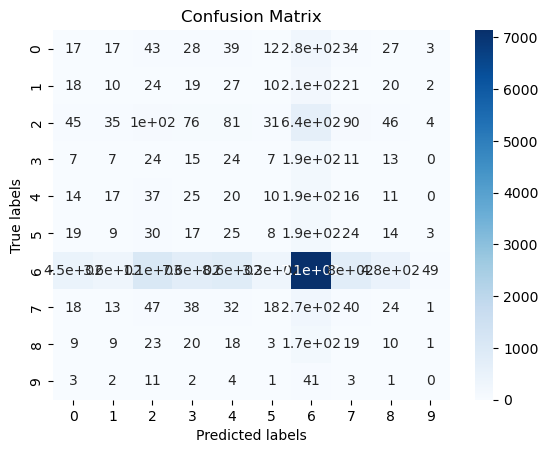

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(test_generator.classes, predicted_labels)

# Create a figure and axis
fig, ax = plt.subplots()

# Create a heatmap from the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')

# Set the title and labels
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

# Show the plot
plt.show()

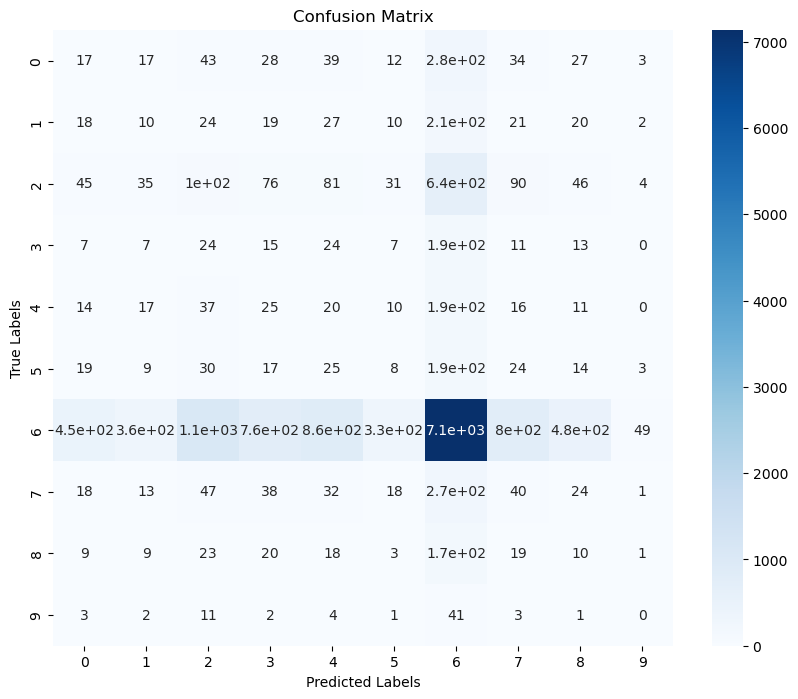

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
conf_mat = confusion_matrix(test_generator.classes, predicted_labels)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, cmap='Blues')

# Set the title and labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()

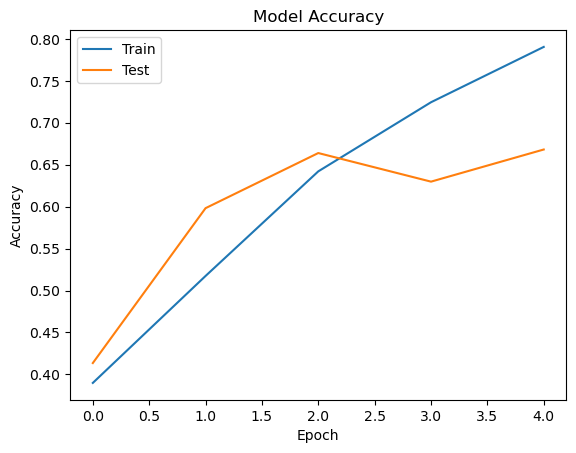

In [43]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

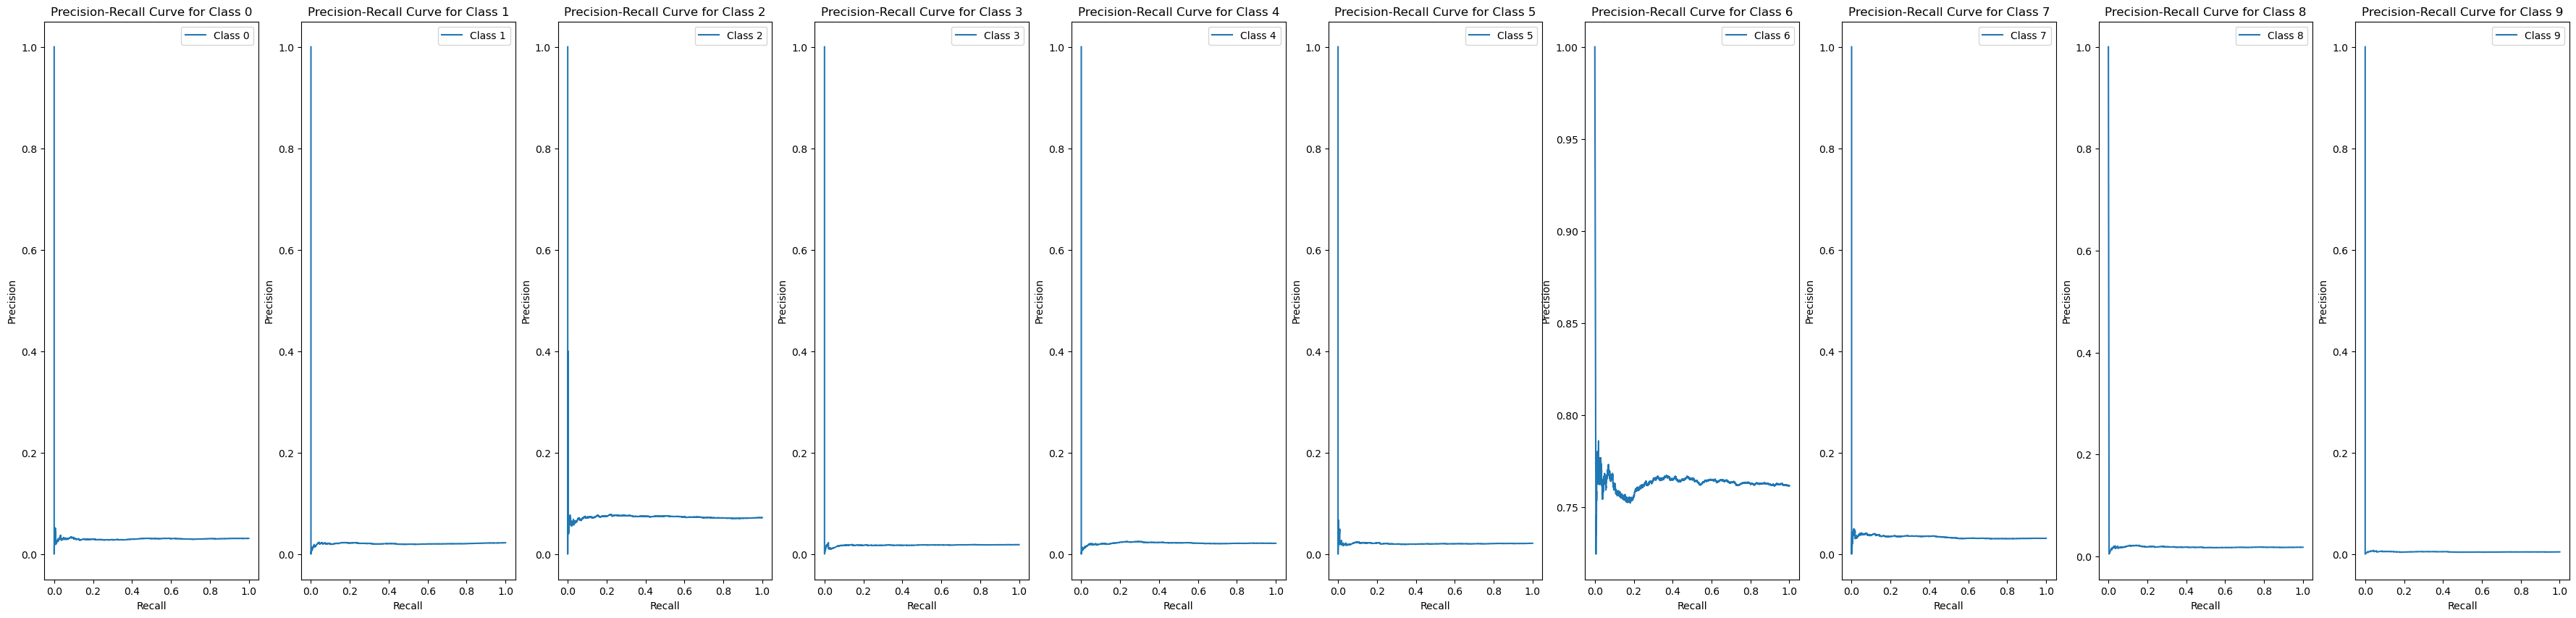

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import numpy as np

# Get the true labels
true_labels = test_generator.classes

# Create a figure and axis
fig, ax = plt.subplots(nrows=1, ncols=len(np.unique(true_labels)), figsize=(45, 10))

# Loop over each class
for i in range(len(np.unique(true_labels))):
    # Get the precision and recall for this class
    precision, recall, _ = precision_recall_curve(true_labels == i, predictions[:, i])
    
    # Plot the precision-recall curve for this class
    ax[i].plot(recall, precision, label=f'Class {i}')
    ax[i].set_xlabel('Recall')
    ax[i].set_ylabel('Precision')
    ax[i].set_title(f'Precision-Recall Curve for Class {i}')
    ax[i].legend(loc='best')

# Show the plot
plt.show()